In [86]:
#import Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loding Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x )

In [87]:
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [88]:
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

In [89]:
df_DA_US_explode = df_DA_US.explode('job_skills')

In [90]:
df_DA_US_explode.pivot_table(index='job_posted_month_no',columns='job_skills', aggfunc='size', fill_value=0)

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,watson,webex,windows,wire,word,workfront,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,12,0,53,0,1,0,0,1,1,8,...,2,0,0,2,10,0,169,0,0,3
2,13,0,34,1,2,0,0,4,2,7,...,0,5,1,1,21,1,128,0,0,2
3,11,0,41,1,3,0,0,6,2,4,...,1,2,0,2,14,3,142,0,0,4
4,5,0,57,1,0,0,0,1,0,1,...,2,0,0,1,24,4,143,1,0,2
5,6,1,35,0,3,0,0,1,2,1,...,0,0,0,1,20,0,92,0,0,1
6,10,3,33,1,1,0,2,0,0,4,...,1,0,0,0,15,2,126,0,0,2
7,13,0,33,0,1,0,0,1,0,4,...,0,0,0,0,15,2,101,0,1,0
8,9,2,29,0,0,0,0,0,0,14,...,0,0,0,1,15,1,112,0,0,5
9,7,0,19,1,0,1,0,2,0,0,...,2,0,0,0,11,0,65,0,0,2


In [91]:
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no',columns='job_skills', aggfunc='size', fill_value=0)
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()
df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_US_pivot = df_DA_US_pivot.drop('Total')
df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,watson,webex,windows,wire,word,workfront,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,12,0,53,0,1,0,0,1,1,8,...,2,0,0,2,10,0,169,0,0,3
2,13,0,34,1,2,0,0,4,2,7,...,0,5,1,1,21,1,128,0,0,2
3,11,0,41,1,3,0,0,6,2,4,...,1,2,0,2,14,3,142,0,0,4
4,5,0,57,1,0,0,0,1,0,1,...,2,0,0,1,24,4,143,1,0,2
5,6,1,35,0,3,0,0,1,2,1,...,0,0,0,1,20,0,92,0,0,1
6,10,3,33,1,1,0,2,0,0,4,...,1,0,0,0,15,2,126,0,0,2
7,13,0,33,0,1,0,0,1,0,4,...,0,0,0,0,15,2,101,0,1,0
8,9,2,29,0,0,0,0,0,0,14,...,0,0,0,1,15,1,112,0,0,5
9,7,0,19,1,0,1,0,2,0,0,...,2,0,0,0,11,0,65,0,0,2


In [92]:
df_DA_US_pivot.loc['Total'].sort_values(ascending=False)

KeyError: 'Total'

<Axes: xlabel='job_posted_month_no'>

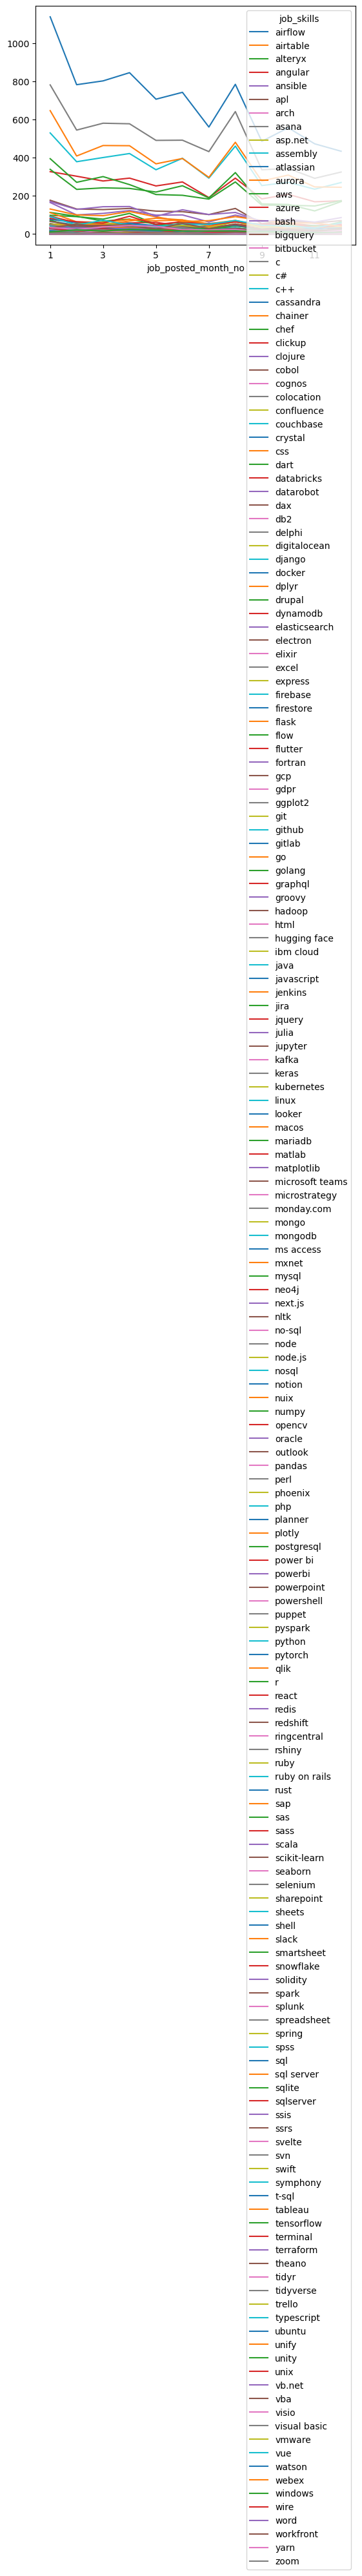

In [ ]:
df_DA_US_pivot.plot(kind='line')

In [ ]:
DA_totals = df_DA_US.groupby('job_posted_month_no').size()

In [95]:
df_DA_US_percent = df_DA_US_pivot.div(DA_totals/100, axis=0)
df_DA_US_percent

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,watson,webex,windows,wire,word,workfront,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,0.660793,0.000000,2.918502,0.000000,0.055066,0.000000,0.000000,0.055066,0.055066,0.440529,...,0.110132,0.000000,0.000000,0.110132,0.550661,0.000000,9.306167,0.000000,0.000000,0.165198
2,1.012461,0.000000,2.647975,0.077882,0.155763,0.000000,0.000000,0.311526,0.155763,0.545171,...,0.000000,0.389408,0.077882,0.077882,1.635514,0.077882,9.968847,0.000000,0.000000,0.155763
3,0.807636,0.000000,3.010279,0.073421,0.220264,0.000000,0.000000,0.440529,0.146843,0.293686,...,0.073421,0.146843,0.000000,0.146843,1.027900,0.220264,10.425844,0.000000,0.000000,0.293686
4,0.365230,0.000000,4.163623,0.073046,0.000000,0.000000,0.000000,0.073046,0.000000,0.073046,...,0.146092,0.000000,0.000000,0.073046,1.753104,0.292184,10.445581,0.073046,0.000000,0.146092
5,0.519031,0.086505,3.027682,0.000000,0.259516,0.000000,0.000000,0.086505,0.173010,0.086505,...,0.000000,0.000000,0.000000,0.086505,1.730104,0.000000,7.958478,0.000000,0.000000,0.086505
6,0.828500,0.248550,2.734051,0.082850,0.082850,0.000000,0.165700,0.000000,0.000000,0.331400,...,0.082850,0.000000,0.000000,0.000000,1.242751,0.165700,10.439105,0.000000,0.000000,0.165700
7,1.361257,0.000000,3.455497,0.000000,0.104712,0.000000,0.000000,0.104712,0.000000,0.418848,...,0.000000,0.000000,0.000000,0.000000,1.570681,0.209424,10.575916,0.000000,0.104712,0.000000
8,0.636492,0.141443,2.050919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.990099,...,0.000000,0.000000,0.000000,0.070721,1.060820,0.070721,7.920792,0.000000,0.000000,0.353607
9,0.817757,0.000000,2.219626,0.116822,0.000000,0.116822,0.000000,0.233645,0.000000,0.000000,...,0.233645,0.000000,0.000000,0.000000,1.285047,0.000000,7.593458,0.000000,0.000000,0.233645


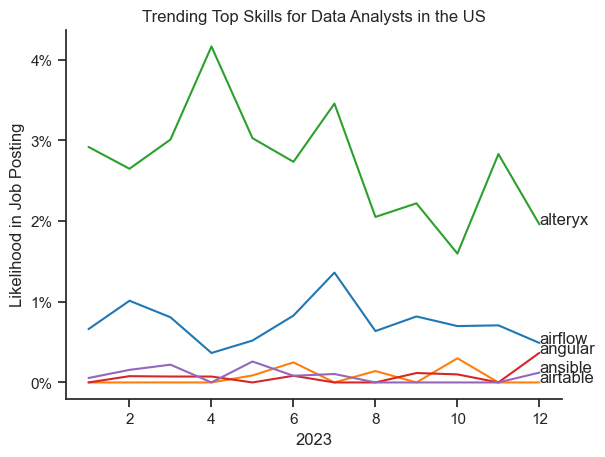

In [118]:
df_plot = df_DA_US_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(12, df_plot.iloc[-1, i], df_plot.columns[i])